In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [53]:
len(shops["coffee_shop_name"].value_counts())

79

In [7]:
shops["coffee_shop_name"].value_counts()

Epoch Coffee                            400
Halcyon                                 300
The Factory - Cafe With a Soul          244
Houndstooth Coffee                      200
Venezia Italian Gelato                  200
                                       ... 
Lucky Lab Coffee                         25
Sister Coffee                            17
Kowabunga Coffee                         16
The Marvelous Vintage Tea Party Co.      10
Lola Savannah Coffee Downtown             4
Name: coffee_shop_name, Length: 79, dtype: int64

In [17]:
shops["star_rating"].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [13]:
type(shops.star_rating.iloc[1])

str

In [18]:
shops.isnull().sum()

coffee_shop_name    0
full_review_text    0
star_rating         0
dtype: int64

In [35]:
def good_or_bad(star_rating):
    if int(star_rating.lstrip()[0]) < 4:
        return "Bad"
    else:
        return "Good"

In [37]:
print(good_or_bad("   5.0 star rating"))

Good


In [27]:
shops["star_rating"].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [38]:
shops["Good/Bad"] = shops["star_rating"].apply(good_or_bad)

In [39]:
shops["Good/Bad"].value_counts()

Good    6140
Bad     1476
Name: Good/Bad, dtype: int64

In [47]:
import datetime

def get_date(full_review_text):
    input = ""
    for number in full_review_text.lstrip().split()[0].split("/"):
        input+=str(number)+"/"
    input = input[:-1]
    format = '%m/%d/%Y'
    return datetime.datetime.strptime(input, format)
    
    

In [46]:
a="1"
for i in [0,1,2,3,4]:
    a+="/"+str(i)
print (a)

1/0/1/2/3/4


In [48]:
print(get_date(shops["full_review_text"].iloc[0]))

2016-11-25 00:00:00


In [49]:
shops["Date"] = shops["full_review_text"].apply(get_date)

In [50]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,Good/Bad,Date
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,Good,2016-11-25
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,Good,2016-12-02
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,Good,2016-11-30
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,Bad,2016-11-25
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,Good,2016-12-03


In [54]:
def get_numeric_rating(star_rating):
    return int(star_rating.lstrip()[0])        
    

In [58]:
print (get_numeric_rating(shops["star_rating"].iloc[0]))

5


In [59]:
shops['Rating'] = shops["star_rating"].apply(get_numeric_rating)

In [60]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,Good/Bad,Date,Rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,Good,2016-11-25,5
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,Good,2016-12-02,4
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,Good,2016-11-30,4
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,Bad,2016-11-25,2
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,Good,2016-12-03,4


In [69]:
import re

def only_alphanum_lower_shrink(coffee_shop_name):
    alphanum = re.sub('[^a-zA-Z 0-9]', '', coffee_shop_name)
    alphanum = re.sub(r"\s+", "", alphanum)
    return alphanum.lower()

In [70]:
print(only_alphanum_lower_strip(shops["coffee_shop_name"].iloc[0]))

thefactorycafewithasoul


In [71]:
shops["Name"] = shops["coffee_shop_name"].apply(only_alphanum_lower_shrink)

In [72]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,Good/Bad,Date,Rating,Name
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,Good,2016-11-25,5,thefactorycafewithasoul
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,Good,2016-12-02,4,thefactorycafewithasoul
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,Good,2016-11-30,4,thefactorycafewithasoul
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,Bad,2016-11-25,2,thefactorycafewithasoul
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,Good,2016-12-03,4,thefactorycafewithasoul


In [73]:
len(shops["Name"].value_counts())

78

In [74]:
#1 of the names was miswritten

In [77]:
def tokenize(full_review_text):
    output = full_review_text.lstrip().split()[1:] #no-date iterable
    output = " ".join(output)
    output = re.sub('[^a-zA-Z 0-9]', "", output)
    return output.lower().split()
    

In [78]:
print(tokenize(shops["full_review_text"].iloc[0]))

['1', 'checkin', 'love', 'love', 'loved', 'the', 'atmosphere', 'every', 'corner', 'of', 'the', 'coffee', 'shop', 'had', 'its', 'own', 'style', 'and', 'there', 'were', 'swings', 'i', 'ordered', 'the', 'matcha', 'latte', 'and', 'it', 'was', 'muy', 'fantastico', 'ordering', 'and', 'getting', 'my', 'drink', 'were', 'pretty', 'streamlined', 'i', 'ordered', 'on', 'an', 'ipad', 'which', 'included', 'all', 'beverage', 'selections', 'that', 'ranged', 'from', 'coffee', 'to', 'wine', 'desired', 'level', 'of', 'sweetness', 'and', 'a', 'checkout', 'system', 'i', 'got', 'my', 'latte', 'within', 'minutes', 'i', 'was', 'hoping', 'for', 'a', 'typical', 'heart', 'or', 'feather', 'on', 'my', 'latte', 'but', 'found', 'myself', 'listing', 'out', 'all', 'the', 'possibilities', 'of', 'what', 'the', 'art', 'may', 'be', 'any', 'ideas']


In [79]:
shops['Tokens'] = shops['full_review_text'].apply(tokenize)

In [80]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,Good/Bad,Date,Rating,Name,Tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,Good,2016-11-25,5,thefactorycafewithasoul,"[1, checkin, love, love, loved, the, atmospher..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,Good,2016-12-02,4,thefactorycafewithasoul,"[listed, in, date, night, austin, ambiance, in..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,Good,2016-11-30,4,thefactorycafewithasoul,"[1, checkin, listed, in, brunch, spots, i, lov..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,Bad,2016-11-25,2,thefactorycafewithasoul,"[very, cool, decor, good, drinks, nice, seatin..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,Good,2016-12-03,4,thefactorycafewithasoul,"[1, checkin, they, are, located, within, the, ..."


In [90]:
shops[shops['full_review_text'] == shops['full_review_text'].iloc[10]] #duplicate reviews?

,coffee_shop_name,full_review_text,star_rating,Good/Bad,Date,Rating,Name,Tokens
10,The Factory - Cafe With a Soul,10/22/2016 1 check-in Listed in Americano Thi...,4.0 star rating,Good,2016-10-22,4,thefactorycafewithasoul,"[1, checkin, listed, in, americano, this, is, ..."
1111,The Factory - Cafe With a Soul,10/22/2016 1 check-in Listed in Americano Thi...,4.0 star rating,Good,2016-10-22,4,thefactorycafewithasoul,"[1, checkin, listed, in, americano, this, is, ..."
2018,The Factory - Cafe With a Soul,10/22/2016 1 check-in Listed in Americano Thi...,4.0 star rating,Good,2016-10-22,4,thefactorycafewithasoul,"[1, checkin, listed, in, americano, this, is, ..."
3116,The Factory - Cafe With a Soul,10/22/2016 1 check-in Listed in Americano Thi...,4.0 star rating,Good,2016-10-22,4,thefactorycafewithasoul,"[1, checkin, listed, in, americano, this, is, ..."


In [92]:
len(shops['full_review_text'].unique())

6915

In [95]:
len(shops['full_review_text'])

7616

In [96]:
shops.shape #original shape

(7616, 8)

In [107]:
shops_raw = shops.drop('Tokens', 1) #dropping tokens since it's not hashable to drop duplicates
unique_shops = shops_raw.drop_duplicates()

In [108]:
unique_shops.shape #confirms that we have duplicates, so we'll work with this

(6915, 7)

In [109]:
unique_shops['Tokens'] = unique_shops['full_review_text'].apply(tokenize) #??? , but it works

/anaconda2/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [110]:
unique_shops.head()

,coffee_shop_name,full_review_text,star_rating,Good/Bad,Date,Rating,Name,Tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,Good,2016-11-25,5,thefactorycafewithasoul,"[1, checkin, love, love, loved, the, atmospher..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,Good,2016-12-02,4,thefactorycafewithasoul,"[listed, in, date, night, austin, ambiance, in..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,Good,2016-11-30,4,thefactorycafewithasoul,"[1, checkin, listed, in, brunch, spots, i, lov..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,Bad,2016-11-25,2,thefactorycafewithasoul,"[very, cool, decor, good, drinks, nice, seatin..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,Good,2016-12-03,4,thefactorycafewithasoul,"[1, checkin, they, are, located, within, the, ..."


In [113]:
unique_shops['Name'].value_counts()

summermooncoffeebar              200
epochcoffee                      200
houndstoothcoffee                200
caffmedici                       143
apanascoffeebeer                 118
                                ... 
luckylabcoffee                    25
sistercoffee                      17
kowabungacoffee                   16
themarvelousvintageteapartyco     10
lolasavannahcoffeedowntown         4
Name: Name, Length: 78, dtype: int64

In [ ]:
"""Epoch Coffee                            400
Halcyon                                 300
The Factory - Cafe With a Soul          244
Houndstooth Coffee                      200
Venezia Italian Gelato                  200
""" # this vs what we have now

In [117]:
good_shops = unique_shops[unique_shops['Good/Bad'] == "Good"].copy()
bad_shops = unique_shops[unique_shops['Good/Bad'] == "Bad"].copy()

In [118]:
good_shops.head()

,coffee_shop_name,full_review_text,star_rating,Good/Bad,Date,Rating,Name,Tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,Good,2016-11-25,5,thefactorycafewithasoul,"[1, checkin, love, love, loved, the, atmospher..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,Good,2016-12-02,4,thefactorycafewithasoul,"[listed, in, date, night, austin, ambiance, in..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,Good,2016-11-30,4,thefactorycafewithasoul,"[1, checkin, listed, in, brunch, spots, i, lov..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,Good,2016-12-03,4,thefactorycafewithasoul,"[1, checkin, they, are, located, within, the, ..."
5,The Factory - Cafe With a Soul,11/20/2016 1 check-in Very cute cafe! I think...,4.0 star rating,Good,2016-11-20,4,thefactorycafewithasoul,"[1, checkin, very, cute, cafe, i, think, from,..."


In [119]:
bad_shops.head()

,coffee_shop_name,full_review_text,star_rating,Good/Bad,Date,Rating,Name,Tokens
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,Bad,2016-11-25,2,thefactorycafewithasoul,"[very, cool, decor, good, drinks, nice, seatin..."
8,The Factory - Cafe With a Soul,"10/25/2016 1 check-in Ok, let's try this appr...",3.0 star rating,Bad,2016-10-25,3,thefactorycafewithasoul,"[1, checkin, ok, lets, try, this, approach, pr..."
11,The Factory - Cafe With a Soul,"11/20/2016 The store has A+ decoration, but h...",3.0 star rating,Bad,2016-11-20,3,thefactorycafewithasoul,"[the, store, has, a, decoration, but, honestly..."
12,The Factory - Cafe With a Soul,11/17/2016 1 check-in Listed in 2016 - The Th...,3.0 star rating,Bad,2016-11-17,3,thefactorycafewithasoul,"[1, checkin, listed, in, 2016, the, third, tim..."
25,The Factory - Cafe With a Soul,"12/2/2016 Okay, so after visiting my friends ...",1.0 star rating,Bad,2016-12-02,1,thefactorycafewithasoul,"[okay, so, after, visiting, my, friends, in, l..."


In [123]:
good_shops['Name'].value_counts()[:10] #Good shops - # of reviews

summermooncoffeebar       172
houndstoothcoffee         164
epochcoffee               144
caffmedici                115
apanascoffeebeer          104
veneziaitaliangelato       97
saten                      95
dolceneve                  94
andersonscoffeecompany     91
coronacoffee               90
Name: Name, dtype: int64

In [124]:
bad_shops['Name'].value_counts()[:10] #Bad shops - # of reviews. We can notice that some of them are at the top of "good" ones too

epochcoffee                 56
onceovercoffeebar           42
strangebrewaustincoffee     40
houndstoothcoffee           36
kickbuttcoffeemusicbooze    34
stinsons                    34
pacha                       33
cuvecoffeebar               33
russellsbakery              31
dominicanjoe                30
Name: Name, dtype: int64

In [125]:
from collections import Counter 

word_counts = Counter() #takes interables, our tokens in this case

good_shops['Tokens'].apply(lambda x: word_counts.update(x))

word_counts.most_common(10) #bunch of stop words -.-

[('the', 24272),
 ('and', 19385),
 ('a', 16194),
 ('i', 13742),
 ('to', 11637),
 ('of', 9159),
 ('is', 8795),
 ('coffee', 7644),
 ('in', 6857),
 ('it', 6298)]

In [131]:
def count(Tokens):
    
    word_counts = Counter()
    appears_in = Counter()
    
    for token in Tokens:
        word_counts.update(token) #stores count of each appearance of a work within a token 
        appears_in.update(set(token)) #using "set" to count avoiding duplicates of a word within a token 
        
    #WORD COUNT STATS
    temp = zip(word_counts.keys(), word_counts.values()) 
    wc = pd.DataFrame(temp, columns= ['word', 'count']) #creating df based on the tuple of tuples created with zip
    
    wc['rank'] = wc['count'].rank(method='first', ascending=False) #using first because it's already organized from the beginning by Counter() 
    total_words = wc['count'].sum()
    
    wc['pct_total'] = wc['count'].apply(lambda word_count: word_count/total_words) # pct of total instances of each word vs total words
    
    #cumulative % of total word count, starting from top to bottom ranked words
    wc = wc.sort_values(by='rank') #using rank as our reference to start from the top ranked word 
    wc['cum_pct_total'] = wc['pct_total'].cumsum()
    
    #DOCUMENT STATS 
    
    temp_2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(temp_2, columns=['word', 'appears_in'])
    
    wc = ac.merge(wc, on='word') #extending wc adding the instances per doc/token of a word 
    total_docs = len(Tokens)
    wc['appears_in_pct'] = wc['appears_in'].apply(lambda instances: instances / total_docs)
    
    return wc.sort_values(by='rank') #sorted by most common words overall (not by unique instances per doc/token)
        

In [134]:
good_shops_wc = count(good_shops['Tokens'])

In [135]:
good_shops_wc.head() #GOOD SHOPS 

,word,appears_in,count,rank,pct_total,cum_pct_total,appears_in_pct
32,the,4986,24272,1.0,0.044632,0.044632,0.892110
44,and,5057,19385,2.0,0.035646,0.080277,0.904813
49,a,4558,16194,3.0,0.029778,0.110055,0.815531
37,i,3985,13742,4.0,0.025269,0.135324,0.713008
61,to,4055,11637,5.0,0.021398,0.156723,0.725532


In [136]:
bad_shops_wc = count(bad_shops['Tokens'])
bad_shops_wc.head() #BAD SHOPS 

,word,appears_in,count,rank,pct_total,cum_pct_total,appears_in_pct
18,the,1222,7243,1.0,0.045813,0.045813,0.921569
31,and,1181,4747,2.0,0.030025,0.075839,0.890649
73,i,1065,4709,3.0,0.029785,0.105624,0.803167
35,a,1130,4427,4.0,0.028001,0.133625,0.852187
188,to,1071,3897,5.0,0.024649,0.158274,0.807692


<AxesSubplot:xlabel='rank', ylabel='cum_pct_total'>

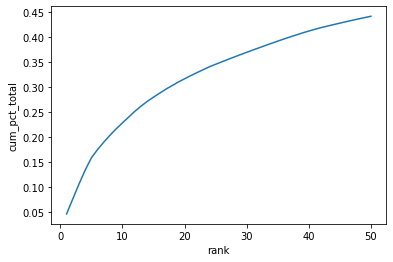

In [143]:
import seaborn as sns

sns.lineplot(x='rank', y='cum_pct_total', data=bad_shops_wc.iloc[:50]) #plotting the top50 rank and cum_pct

In [146]:
bad_shops_wc[bad_shops_wc['rank'] < 21]['cum_pct_total'] # detailed cum_pct of the top20 rank

18     0.045813
31     0.075839
73     0.105624
35     0.133625
188    0.158274
347    0.174878
5      0.189723
8      0.203594
40     0.216415
29     0.228192
27     0.239818
17     0.251399
211    0.261754
33     0.271267
263    0.279774
159    0.287769
144    0.295751
127    0.302918
221    0.310021
92     0.316460
Name: cum_pct_total, dtype: float64

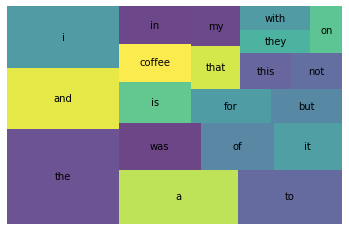

In [147]:
import squarify
import matplotlib.pyplot as plt

bad_top20 = bad_shops_wc[bad_shops_wc['rank'] < 21]

squarify.plot(sizes=bad_top20['pct_total'], label=bad_top20['word'], alpha=.8) # word map of BAD SHOPS
plt.axis('off')
plt.show()

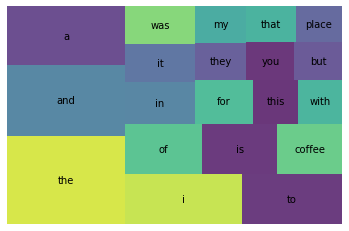

In [148]:
good_top20 = good_shops_wc[good_shops_wc['rank'] < 21]

squarify.plot(sizes=good_top20['pct_total'], label=good_top20['word'], alpha=.8) # word map of GOOD SHOPS
plt.axis('off')
plt.show()

In [149]:
import spacy
nlp = spacy.load('en_core_web_md')

In [151]:
sample = """
Natural Language Processing Summary
The field of study that focuses on the interactions between human language and computers is called Natural Language Processing, or NLP for short. It sits at the intersection of computer science, artificial intelligence, and computational linguistics (Wikipedia).

“Nat­ur­al Lan­guage Pro­cessing is a field that cov­ers com­puter un­der­stand­ing and ma­nip­u­la­tion of hu­man lan­guage, and it’s ripe with pos­sib­il­it­ies for news­gath­er­ing,” Anthony Pesce said in Natural Language Processing in the kitchen. “You usu­ally hear about it in the con­text of ana­lyz­ing large pools of legis­la­tion or other doc­u­ment sets, at­tempt­ing to dis­cov­er pat­terns or root out cor­rup­tion.”

"""

In [152]:
doc = nlp(sample)

In [157]:

#TOKENIZER USING SPACY

spacy_tokens = []

for doc in nlp.pipe(good_shops['full_review_text']): #GOOD SHOPS 
    doc_tokens = []
    for token in doc:
        doc_tokens.append(token.text)
    spacy_tokens.append(doc_tokens)

good_shops['spacy_tokens'] = spacy_tokens 

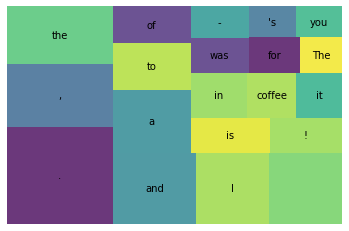

In [158]:
#CREATE THE WORD COUNT DF FOR STATS

def square_top_20(tokens):
    wc = count(tokens)
    wc_top20 = wc[wc['rank'] < 21]
    
    squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8)
    plt.axis('off')
    return plt

square_top_20(good_shops['spacy_tokens']).show() #GOOD SHOPS SQUARIFY
    

In [171]:
import itertools

set(itertools.islice(nlp.Defaults.stop_words, 10)) #random slice 

{'afterwards',
 'another',
 'everywhere',
 'for',
 'made',
 'name',
 'namely',
 'over',
 'yours',
 '‘m'}

In [182]:
def cut_dates(text): # getting rid of the date that appears on each text row
    output = text.lstrip().split()[1:]
    output = " ".join(output)
    return output

def final_tokenizer(text_col):
    
    new_col = text_col.apply(cut_dates)
    
    tokens = []
    
    for doc in nlp.pipe(new_col):
        
        doc_tokens = []
        
        for token in doc:
            if (not token.is_stop) & (not token.is_punct): # & (token.text.lower()) not in STOP_WORDS 
                doc_tokens.append(token.text.lower())
        
        tokens.append(doc_tokens)
    
    """
    if we were to apply statistical stopword trimming we should do it here:
    wc = count(tokens)
    and start the process again with a conditional related to the "appears_in_pct"
        
    """
    return tokens 

In [183]:
good_shops['final_tokens'] = final_tokenizer(good_shops['full_review_text'])

<module 'matplotlib.pyplot' from '/anaconda2/envs/U4-S1-NLP/lib/python3.7/site-packages/matplotlib/pyplot.py'>

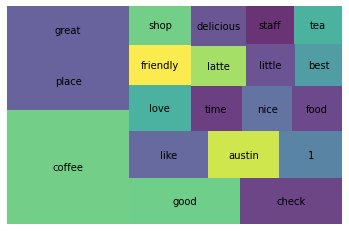

In [184]:
square_top_20(good_shops['final_tokens'])

In [ ]:
# in case we want to extend the stop words I left a commented extension within the final_tokenizer referrencing STOP_WORDS below
# STOP_WORDS = nlp.Defaults.stop_words.union(['a', 'b', 'c'])

<AxesSubplot:xlabel='appears_in_pct'>

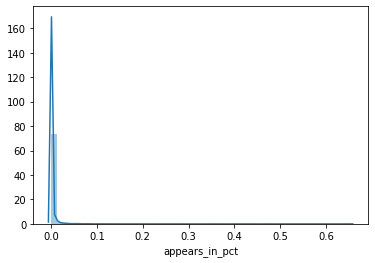

In [191]:
good_shops_wc = count(good_shops['final_tokens']) #updating the df since we have better tokens, but no time to update bad_shops

sns.distplot(good_shops_wc['appears_in_pct'])


<AxesSubplot:xlabel='appears_in_pct'>

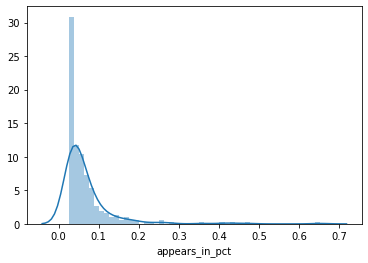

In [192]:
query = good_shops_wc[good_shops_wc['appears_in_pct'] >= 0.025]
sns.distplot(query['appears_in_pct'])

In [193]:
#token.lemma_

In [194]:
sent = "men man women woman wolf wolves run runs running go going went gone"
doc = nlp(sent) # I can nlp a string and work from there at a unit level, useful for our super tokenizer stat-trimming

# Lemma Attributes
for token in doc:
    print(token.text, "  ", token.lemma_)

men    man
man    man
women    women
woman    woman
wolf    wolf
wolves    wolf
run    run
runs    run
running    run
go    go
going    go
went    go
gone    go


In [197]:
#STEMMING

In [196]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

words = ["is", "was", "be", "are", "messed", "mess", "feed", "mixed", "tied"]

for word in words:
    print(ps.stem(word))

is
wa
be
are
mess
mess
feed
mix
tie
